In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import spatial
import xarray as xr

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# to do: select only the applicable date from L4 
#    and try restrict lats and lons of l2 dataset

l4 = xr.open_dataset('../Data/cci_sst.nc')
l4 = l4.sel(time=slice('2008-12-18','2008-12-24'))

l2_list = glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200903*.nc')
l3_list = glob.glob('../Data/TSST/ESA_CCI_L3U_AATSR_200812*.nc')

'''
https://data-dive.com/interactive-large-data-plots-datashader
'''

# l2 = xr.open_dataset('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081218.nc')
# l2 = xr.open_mfdataset(glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200812*.nc'))

# l3 = xr.open_dataset('../Data/TSST/ESA_CCI_L3U_AATSR_20081218.nc')

'\nhttps://data-dive.com/interactive-large-data-plots-datashader\n'

In [32]:
tester = xr.open_dataset('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081218.nc')
tester

In [33]:
tester_df = tester.to_dataframe()
ind = np.where((tester_df['latitude'] <= -10) & (tester_df['latitude'] >= -50 ) & ((tester_subset['longitude'] <= 70) & (tester_subset['longitude'] >= 0)))[0]
tester_df_dropped = tester_df.iloc[ind]

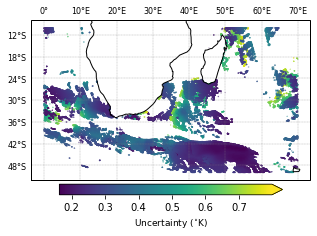

<Figure size 432x288 with 0 Axes>

In [29]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(tester_df_dropped['longitude'], tester_df_dropped['latitude'], c=tester_df_dropped['standard_deviation'], s=0.02)
# plt.scatter(tester_subset['longitude'], tester_subset['latitude'], s=0.05, c=tester_subset['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0)
cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
cbar.set_label('Uncertainty ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

# Plot along-track point obs standard deviation

## L2

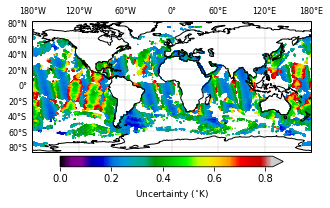

<Figure size 432x288 with 0 Axes>

In [7]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l2['longitude'], l2['latitude'], s=0.05, c=l2['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0)
cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
cbar.set_label('Uncertainty ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## L3

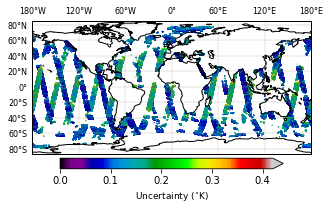

<Figure size 432x288 with 0 Axes>

In [6]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l3['longitude'], l3['latitude'], s=0.05, c=l3['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0)
cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
cbar.set_label('Uncertainty ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

# Plot errors without differences

## L4

0
1
2
3
4
5
6


/home/harry/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[]

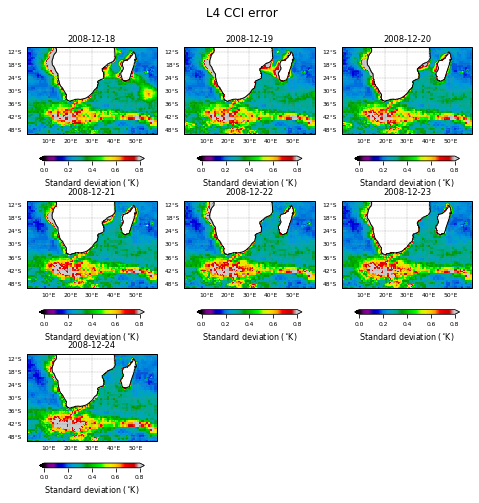

In [23]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
fig.suptitle('L4 CCI error', y=0.95)

for i in range(0,7):
    print(i)
    
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = l4['analysis_uncertainty'][i].plot(transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0, vmax=0.8)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.17)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=8)

    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = False
    gl.xlabels_bottom = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 6}
    gl.ylabel_style = {'size': 6}
    
    ax.set_title('{0}'.format(l4['analysis_uncertainty'][i]['time'].data.astype('datetime64[D]')), fontsize='small')

plt.tight_layout(h_pad=1.0)
plt.savefig('../Figures/error_differences/L4_error.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()

## L2

0
1
2
3
4
5
6


/home/harry/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[]

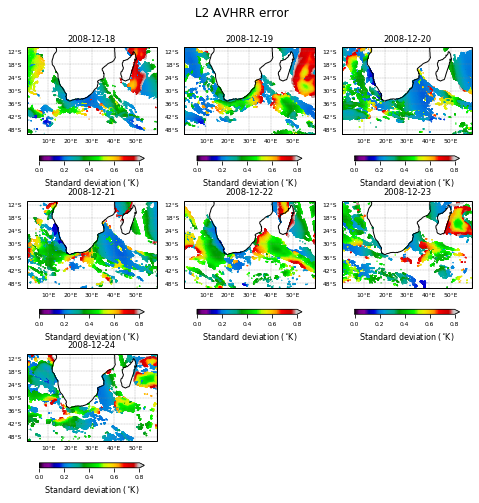

In [30]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
fig.suptitle('L2 AVHRR error', y=0.95)

for i in range(0,7):
    print(i)
    
    l2_dataset = xr.open_dataset(l2_list[i])
    l2_dataset = l2_dataset.where((l2_dataset['latitude'] <= -10) & (l2_dataset['latitude'] >= -50))
    l2_dataset = l2_dataset.where((l2_dataset['longitude'] <= 70) & (l2_dataset['longitude'] >= 0))
    l2_dataset = l2_dataset.to_dataframe()
    ind = np.where((l2_dataset['latitude'] <= -10) & (l2_dataset['latitude'] >= -50 ) & ((l2_dataset['longitude'] <= 70) & (l2_dataset['longitude'] >= 0)))[0]
    l2_dataset = l2_dataset.iloc[ind]
        
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l2_dataset['longitude'], l2_dataset['latitude'], s=0.05, c=l2_dataset['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=0.8)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.17)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=8)
    
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = False
    gl.xlabels_bottom = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 6}
    gl.ylabel_style = {'size': 6}
    
    ax.set_title('{0}'.format(l4['analysis_uncertainty'][i]['time'].data.astype('datetime64[D]')), fontsize='small')

plt.tight_layout(h_pad=1.0)
# plt.savefig('../Figures/error_differences/L2_tracksAtSEN900Error.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()

## L3

0
1
2
3
4
5
6


/home/harry/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[]

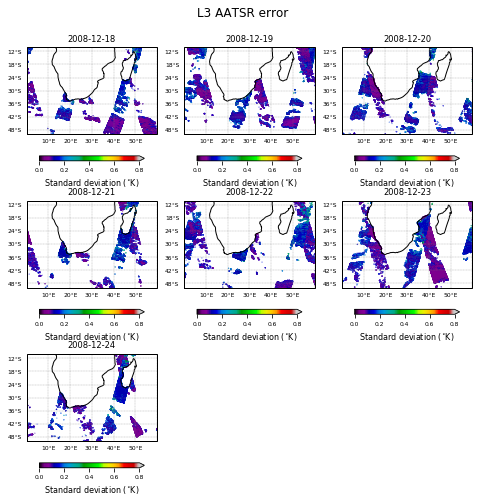

In [31]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
fig.suptitle('L3 AATSR error', y=0.95)

for i in range(0,7):
    print(i)
    
    l3_dataset = xr.open_dataset(l3_list[i])
    l3_dataset = l3_dataset.where((l3_dataset['latitude'] <= -10) & (l3_dataset['latitude'] >= -50))
    l3_dataset = l3_dataset.where((l3_dataset['longitude'] <= 70) & (l3_dataset['longitude'] >= 0))
    l3_dataset = l3_dataset.to_dataframe()
    ind = np.where((l3_dataset['latitude'] <= -10) & (l3_dataset['latitude'] >= -50 ) & ((l3_dataset['longitude'] <= 70) & (l3_dataset['longitude'] >= 0)))[0]
    l3_dataset = l3_dataset.iloc[ind]
        
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l3_dataset['longitude'], l3_dataset['latitude'], s=0.05, c=l3_dataset['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=0.8)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.17)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=8)
    
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = False
    gl.xlabels_bottom = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 6}
    gl.ylabel_style = {'size': 6}
    
    ax.set_title('{0}'.format(l4['analysis_uncertainty'][i]['time'].data.astype('datetime64[D]')), fontsize='small')

plt.tight_layout(h_pad=1.0)
# plt.savefig('../Figures/error_differences/L3_error.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()

# Define function for finding difference between point obs and nearest grid neighbour

In [35]:
def NearestNeighbourDiff(grid, points, gridInf=1, pointsInf=1):
    ''' The KDTree method used below is outlined at the link below:
       https://github.com/blaylockbk/pyBKB_v3/blob/master/demo/KDTree_nearest_neighbor.ipynb
    with some minor modifications in order to produce the differences.
    '''
    
    # Try find lon and lat variables for gridded dataset
    try:
        gridLons = grid['longitude']
    except KeyError:
        try:
            gridLons  = grid['lon']
        except KeyError:
            print("Can't detect gridded dataset longitude dimension.")
            
    try:
        gridLats = grid['latitude']
    except KeyError:
        try:
            gridLats  = grid['lat']
        except KeyError:
            print("Can't detect gridded dataset latitude dimension.")
    
    # Try find lon and lat variables for point observations dataset
    try:
        pointsLons = points['longitude']
    except KeyError:
        try:
            pointsLons  = points['lon']
        except KeyError:
            print("Can't detect point observations longitude dimension.")
            
    try:
        pointsLats = points['latitude']
    except KeyError:
        try:
            pointsLats  = points['lat']
        except KeyError:
            print("Can't detect point observations latitude dimension.")
    
    # Create meshgrid for use with KDTree
    x,y = np.meshgrid(*(gridLons, gridLats))
    
    # Build KDTree from L4 grid
    print('Now building KDTree...')
    tree = spatial.cKDTree(np.column_stack([x.ravel(), y.ravel()]))
    
    # Gather obs coordinates into a numpy column stack
    obs_points = np.column_stack([pointsLons, pointsLats])
    
    # Obtain distances between L2 obs and nearest L4 cell and the index of the L4 cell as
    #   recorded in the KDTree object (tree). Setting upper bound limits distances between
    #   L2 obs and L4 cells and will speed up the operation.
    print('Now querying KDTree for point observations...')
    dist, idx = tree.query(obs_points, distance_upper_bound=0.05, n_jobs=-1)
    print('Tree query completed.')
    
    # Squeeze L4 SSTs and then stack to obtain vector of temperatures to match shape of
    #   L2 observations for easy differencing
    grid_VecErrs = grid['analysis_uncertainty'].squeeze().stack(vec=['lon', 'lat'])
    
    # Obtain the difference between the L2 obs and the nearest L4 cell
    error_diff = (points['standard_deviation'] * pointsInf) - (grid_VecErrs[idx-1].data * gridInf)
    
    return error_diff, gridInf, pointsInf

# Plot differences between L4 and TSSTs

## L4 vs L2

0
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
1
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
2
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
3
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
4
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
5
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
6
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.


/home/harry/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[]

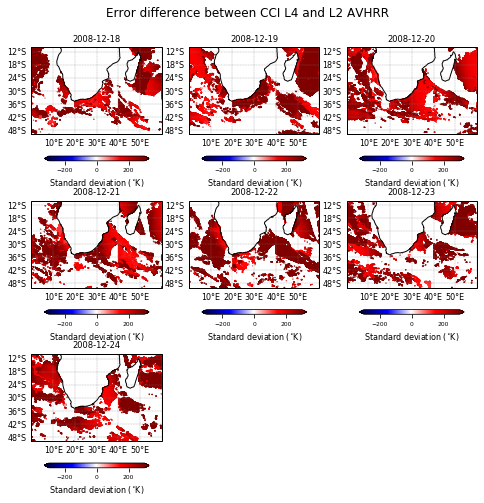

In [38]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
fig.suptitle('Error difference between CCI L4 and L2 AVHRR', y=0.95)

for i in range(0,7):
    print(i)
    
    l2_dataset = xr.open_dataset(l2_list[i])
    l2_dataset = l2_dataset.to_dataframe()
    ind = np.where((l2_dataset['latitude'] <= -10) & (l2_dataset['latitude'] >= -50 ) & ((l2_dataset['longitude'] <= 70) & (l2_dataset['longitude'] >= 0)))[0]
    l2_dataset = l2_dataset.iloc[ind]
    errDiff, gridInf, pointsInf = NearestNeighbourDiff(l4.isel(time=i), l2_dataset, gridInf=25, pointsInf=800)
    
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l2_dataset['longitude'], l2_dataset['latitude'], s=0.05, c=errDiff, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-300, vmax=300)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.17)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=8)

    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = False
    gl.xlabels_bottom = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.set_title('{0}'.format(l4['analysis_uncertainty'][i]['time'].data.astype('datetime64[D]')), fontsize='small')

plt.tight_layout(h_pad=1.0)
# plt.savefig('../Figures/error_differences/L4_{0}_L2_{1}.png'.format(gridInf, pointsInf), dpi=300, bbox_inches='tight', format='png')
plt.plot()

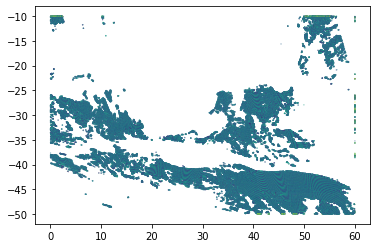

In [65]:
xs = tree.data[idx-1][:,0]
ys = tree.data[idx-1][:,1]
plt.scatter(xs, ys, s=0.05, c=dist)

## L4 vs L3

0
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
1
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
2
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
3
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
4
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
5
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
6
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.


/home/harry/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[]

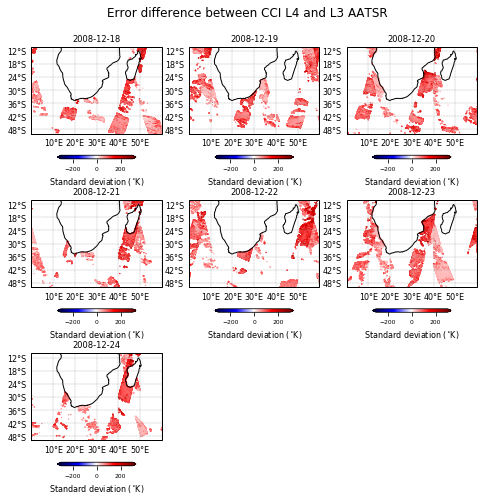

In [39]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
fig.suptitle('Error difference between CCI L4 and L3 AATSR', y=0.95)

for i in range(0,7):
    print(i)
    
    l3_dataset = xr.open_dataset(l3_list[i])
    l3_dataset = l3_dataset.to_dataframe()
    ind = np.where((l3_dataset['latitude'] <= -10) & (l3_dataset['latitude'] >= -50 ) & ((l3_dataset['longitude'] <= 70) & (l3_dataset['longitude'] >= 0)))[0]
    l3_dataset = l3_dataset.iloc[ind]
    errDiff, gridInf, pointsInf = NearestNeighbourDiff(l4.isel(time=i), l3_dataset, gridInf=25, pointsInf=800)
    
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l3_dataset['longitude'], l3_dataset['latitude'], s=0.05, c=errDiff, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-300, vmax=300)
    cbar = plt.colorbar(img, shrink=0.6, extend='both', orientation='horizontal', pad=0.17)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=8)

    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = False
    gl.xlabels_bottom = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.set_title('{0}'.format(l4['analysis_uncertainty'][i]['time'].data.astype('datetime64[D]')), fontsize='small')
    
plt.tight_layout(h_pad=1.0)
# plt.savefig('../Figures/error_differences/L4_{0}_L3_{1}.png'.format(gridInf, pointsInf), dpi=300, bbox_inches='tight', format='png')
plt.plot()

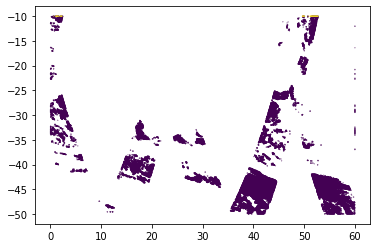

In [56]:
xs = tree.data[idx-1][:,0]
ys = tree.data[idx-1][:,1]
plt.scatter(xs, ys, s=0.05, c=dist)